# WEEK3 INFORMATION
# 1. Scissors rock paper analysis


In [1]:
#------------------------------------------------------------
# WHEN RUNNING LOCALLY UPDATE THIS CELL TO SET UP DATASET LOCATION
#------------------------------------------------------------
BASEURITXT='/home/jovyan/notebooks/CSYS5030/data/SPR'

In [2]:
#------------------------------------------------------------
# LOAD GAMES FROM TEXT FILES
#------------------------------------------------------------

import re
from pathlib import Path

# moves = { 'scissors':0, 'paper':1, 'rock':2}
def getResult(game1: int, game2: int):
    results = [[0,1, -1], [-1, 0, 1], [1,-1,0]]
    result=results[game1][game2]
    return result

def loadGames(baseUriStr: str):

    player1Regex = re.compile('(?<=Player1:\s).*(?=;)')
    player2Regex = re.compile('(?<=Player2:\s).*(?=$)')
    game1Regex = re.compile('(?<=^)[012](?=\s)')
    game2Regex = re.compile('(?<=\s)[012](?=$)')

    baseUri=Path(baseUriStr)
    txtFiles=[x for x in baseUri.glob('**/*.txt')]

    # game = [game#, player1, player2, moveplayer1, moveplayer2]
    filenum=0
    games=list()
    for tf in txtFiles:
        with open(tf, 'rt') as f:
            lines = f.readlines()
    
        for i, line in enumerate(lines):
            if (i == 0):
                player1 = re.findall(player1Regex, line)[0].lower()
                player2 = re.findall(player2Regex, line)[0].lower()
            else:
                game1 =  int(re.findall(game1Regex, line)[0])
                game2 =  int(re.findall(game2Regex, line)[0])
                result = getResult(game1, game2)
                result2 = getResult(game2, game1)
                games.append([filenum, player1, player2, game1, game2, result, result2])

        filenum+=1

    return games

            


In [3]:
games = loadGames(BASEURITXT)





In [4]:
#------------------------------------------------------------
# LIST PLAYERS
#------------------------------------------------------------

import numpy as np

def listPlayers(games: list):
    listPs = list()
    listPs += [ [game[1], game[2]] for game in games]
    listPs = np.array(listPs).flatten()
    Ps=list(set(listPs))
    return Ps

In [5]:
players = listPlayers(games)
print(players)
print(players[0])


['clover', 'yizhi', 'm-sizzle', 'isabelle', 'kc', 'stuart', 'sebastian']
clover


In [6]:
#------------------------------------------------------------
#   GET 1 PLAYER MOVES AND RESULTS ACCROSS ALL GAMES
#------------------------------------------------------------

import pandas as pd

def getPlayerAllMovesAndGains(playerName: str, games: np.array):
    playerName = playerName.lower()
    df_games = pd.DataFrame(games, columns = ['Game#', 'Player1', 'Player2', 'Move1', 'Move2', 'Result1', 'Result2' ])
    d1 = df_games.loc[ df_games.Player1 == playerName]
    moveWhen1 = list(d1.Move1)
    winWhen1 = list(d1.Result1)
    d2 = df_games.loc[ df_games.Player2 == playerName]
    moveWhen2 = list(d2.Move2)
    winWhen2 = list(d2.Result2)

    return moveWhen1 + moveWhen2, winWhen1 + winWhen2

moves, gains = getPlayerAllMovesAndGains('Isabelle', games)

print(gains)
print(moves)

print(len(gains))
print(len(moves))




[-1, -1, -1, 1, 0, 0, 1, 1, 1, 1, -1, -1, -1, 0, 0, -1, 1, 0, -1, -1, -1, -1, -1, 0, 1, 0, 1, -1, -1, -1, 1, -1, 0, 0, 0, 1, 1, 0, -1, 0, 0, 0, 1, 1]
[1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2]
44
44


In [7]:
from week1 import entropyEmpirical
entropyEmpirical(moves)

1.5488102670635504

In [8]:
players=listPlayers(games)

In [9]:
#------------------------------------------------------------
#   GET 1 PLAYER MOVES AND RESULTS ACCROSS ALL GAMES
#------------------------------------------------------------

playersGameEntropy=dict()
for player in players:
    playersGameEntropy[player]=None


In [10]:
from week1 import entropyEmpirical

scores=list()
entropies=list()
lossRatios=list()
winRatios=list()
for player in players:
    moves, gains = getPlayerAllMovesAndGains(player, games)
    playersGameEntropy[player] = entropyEmpirical(moves)
    gains=np.array(gains)
    score=np.sum(gains)
    winRatio=len(list(gains[gains==1]))/len(list(gains))
    lossRatio=len(list(gains[gains==-1]))/len(list(gains))
    winRatios.append(winRatio)
    lossRatios.append(lossRatio)
    scores.append(score)
    entropies.append(playersGameEntropy[player])
    print('{} plays with entropy {} and in average a score of {}'.format(player, playersGameEntropy[player], score))
    print('winRatio {}, lossRatio {}'.format(winRatio, lossRatio))



clover plays with entropy 1.516147658077609 and in average a score of -3
winRatio 0.16, lossRatio 0.28
yizhi plays with entropy 1.4987512731845576 and in average a score of 3
winRatio 0.38235294117647056, lossRatio 0.29411764705882354
m-sizzle plays with entropy 1.5602518646164185 and in average a score of 1
winRatio 0.4, lossRatio 0.37777777777777777
isabelle plays with entropy 1.5488102670635504 and in average a score of -4
winRatio 0.29545454545454547, lossRatio 0.38636363636363635
kc plays with entropy 1.565596230357602 and in average a score of 3
winRatio 0.4, lossRatio 0.3
stuart plays with entropy 1.4839123015466111 and in average a score of -3
winRatio 0.2857142857142857, lossRatio 0.37142857142857144
sebastian plays with entropy 1.4396275363413569 and in average a score of 3
winRatio 0.28, lossRatio 0.16


No handles with labels found to put in legend.


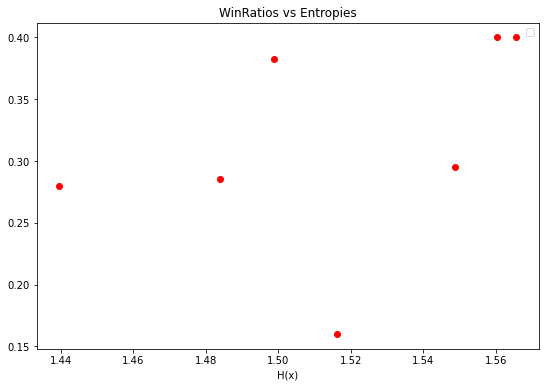

In [11]:
#------------------------------------------------------------
#   PLOT Entropies vs WinRatios
#------------------------------------------------------------


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(entropies, winRatios, 'ro')
axs.set_title('WinRatios vs Entropies')
axs.set_xlabel('H(x)')
plt.legend()
plt.show()



No handles with labels found to put in legend.


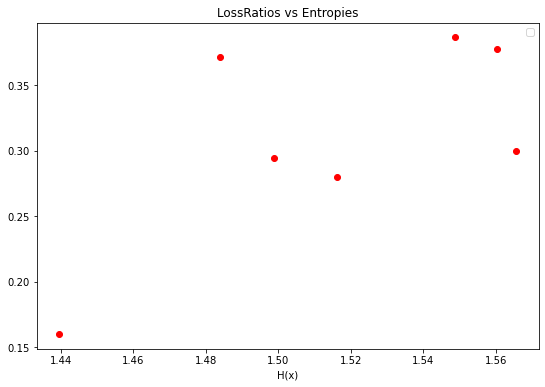

In [12]:
#------------------------------------------------------------
#   PLOT Entropies vs LossRatios
#------------------------------------------------------------


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(entropies, lossRatios, 'ro')
axs.set_title('LossRatios vs Entropies')
axs.set_xlabel('H(x)')
plt.legend()
plt.show()


No handles with labels found to put in legend.


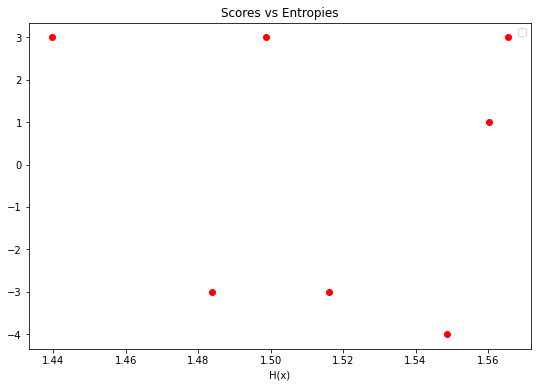

In [13]:
#------------------------------------------------------------
#   PLOT Entropies vs Scores
#------------------------------------------------------------


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(9, 6))  
axs.plot(entropies, scores, 'ro')
axs.set_title('Scores vs Entropies')
axs.set_xlabel('H(x)')
plt.legend()
plt.show()


# 4. mutual information

In [14]:
from week1 import mutualInformation

p = [[0.2, 0.3],[0.1, 0.4]]
mutualInformation(p)
#correct result = 0.034851554559677256

0.034851554559677256

In [15]:
p=[[0.5,0],[0,0.5]]
mutualInformation(p)
#correct result = 1

1.0

In [16]:
p=[[0.25,0.25],[0.25,0.25]]
mutualInformation(p)
#correct result = 0 bits

0.0

In [17]:
from week1 import mutualInformationEmpirical

samples = [[0,0],[0,1],[1,0],[1,1]]
mutualInformationEmpirical(samples)
#correct answer : 0 bits cause knowing about 1 does't give any information about the state of the other

0.0

In [18]:
samples = [[0,0],[0,0],[1,1],[1,1]]
mutualInformationEmpirical(samples)
#correct answer : 1 bits, cause knowing 1 is knowing the other

1.0

# Mutual information between successive letters in written English   

In [19]:
import re
from week1 import entropyEmpirical, mutualInformationEmpirical, conditionalEntropyEmpirical, jointEntropyEmpirical

filename = './data/Seinfeld-scripts-textOnly.txt'
with open(filename, 'rt') as f:
    text = f.read()


p = re.compile('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]*')

processedStr = p.sub('', ' '.join(text.lower().split()))

sample = [ char for char in processedStr]
entropyEmpirical(sample)

4.093811389530426

In [20]:
print(processedStr[0:200])

do you know what this is all about do you know why were here to be out this is outand out is one of the single most enjoyable experiences of life peopledid you ever hear people talking about we should


In [21]:
samples = [[char1, char2] for char1, char2 in list(zip(processedStr[slice(0, None, 1)], processedStr[slice(1, None, 1)])) ]

## Compute this mutual information and compare that to the average entropy of each character computed as per step 5 of the activity in the previous module

In [22]:
mutualInformationEmpirical(samples)

0.7269903009049097

In [23]:
conditionalEntropyEmpirical(samples)

3.366821110907419

In [24]:
4.093811389530425 - 3.366821110907418




0.7269902786230071

We obtain the
H(X) - H(X|Y) = I(X;Y)

1. What proportion of our uncertainty about the next character in the written text is reduced by observing the previous character?  

We have reduce uncertainty by 0.73 bits

1. How much code could we save in communicating a character if our coding scheme took the previous character into account? 

Instead of having to use 4.0938 bits we could use only 3.3668 bits 

2. The mutual information computes a measure of the relationship between the consecutive characters here. You're probably familiar with using correlation to measure a relationship between variables -- could correlation be used here? We will see more about how MI and correlation are related in the coming weeks.

https://www.statology.org/correlation-in-python/    
https://realpython.com/numpy-scipy-pandas-correlation-python/   
https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/    

Calculate the correlation between the two arrays   
Here the 2 arrays are the 2 arrays containing successive characters


In [25]:
from sklearn import preprocessing 
labelEncoder = preprocessing.LabelEncoder() 
labelEncoder.fit(samples[:,0])
labelEncoder.fit(samples[:,1])
 
samplex= labelEncoder.transform(samples[:,0]) 
sampley= labelEncoder.transform(samples[:,1]) 


TypeError: list indices must be integers or slices, not tuple

In [ ]:
np.corrcoef(samplex, sampley)

The above corrcoeff calculates the Pearson corerlation coefficient matrix, which is a measure of linear correlation. It may be otherwise correlated than linear.

Also the data is not numerical, it is categorical (list of letters). So doing the trick of encoding it into integers creates an order (a < b < c  etc...depending on which letter is encoded by which integer) that isn't there. So it gives flawed information.

In [ ]:
print(samplex)

In [ ]:
print(sampley)

## Are there relationships between previous characters and later characters beyond those which are consecutive?
0.3 something 2l
0.1 something 3l
0.05 something 4l

In [ ]:
 samples_2l = [[char1, char2] for char1, char2 in list(zip(processedStr[slice(0, None, 2)], processedStr[slice(2, None, 2)])) ] 

In [ ]:
mutualInformationEmpirical(samples_2l)

In [ ]:
samples_3l = [[char1, char2] for char1, char2 in list(zip(processedStr[slice(0, None, 3)], processedStr[slice(3, None, 3)])) ] 

In [ ]:
mutualInformationEmpirical(samples_3l)